In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./depression_dataset.csv')
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Text(No, 11565, '41.45 %')

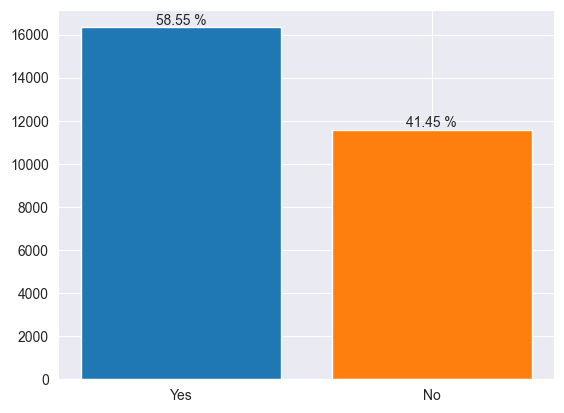

In [5]:
val_con = df['Depression'].value_counts()
plt.bar('Yes', val_con.loc[1])
plt.text('Yes', val_con.loc[1], str(round(val_con.loc[1] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')
plt.bar('No', val_con.loc[0])
plt.text('No', val_con.loc[0], str(round(val_con.loc[0] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')

In [6]:
cat_col_long = ['City', 'Degree']

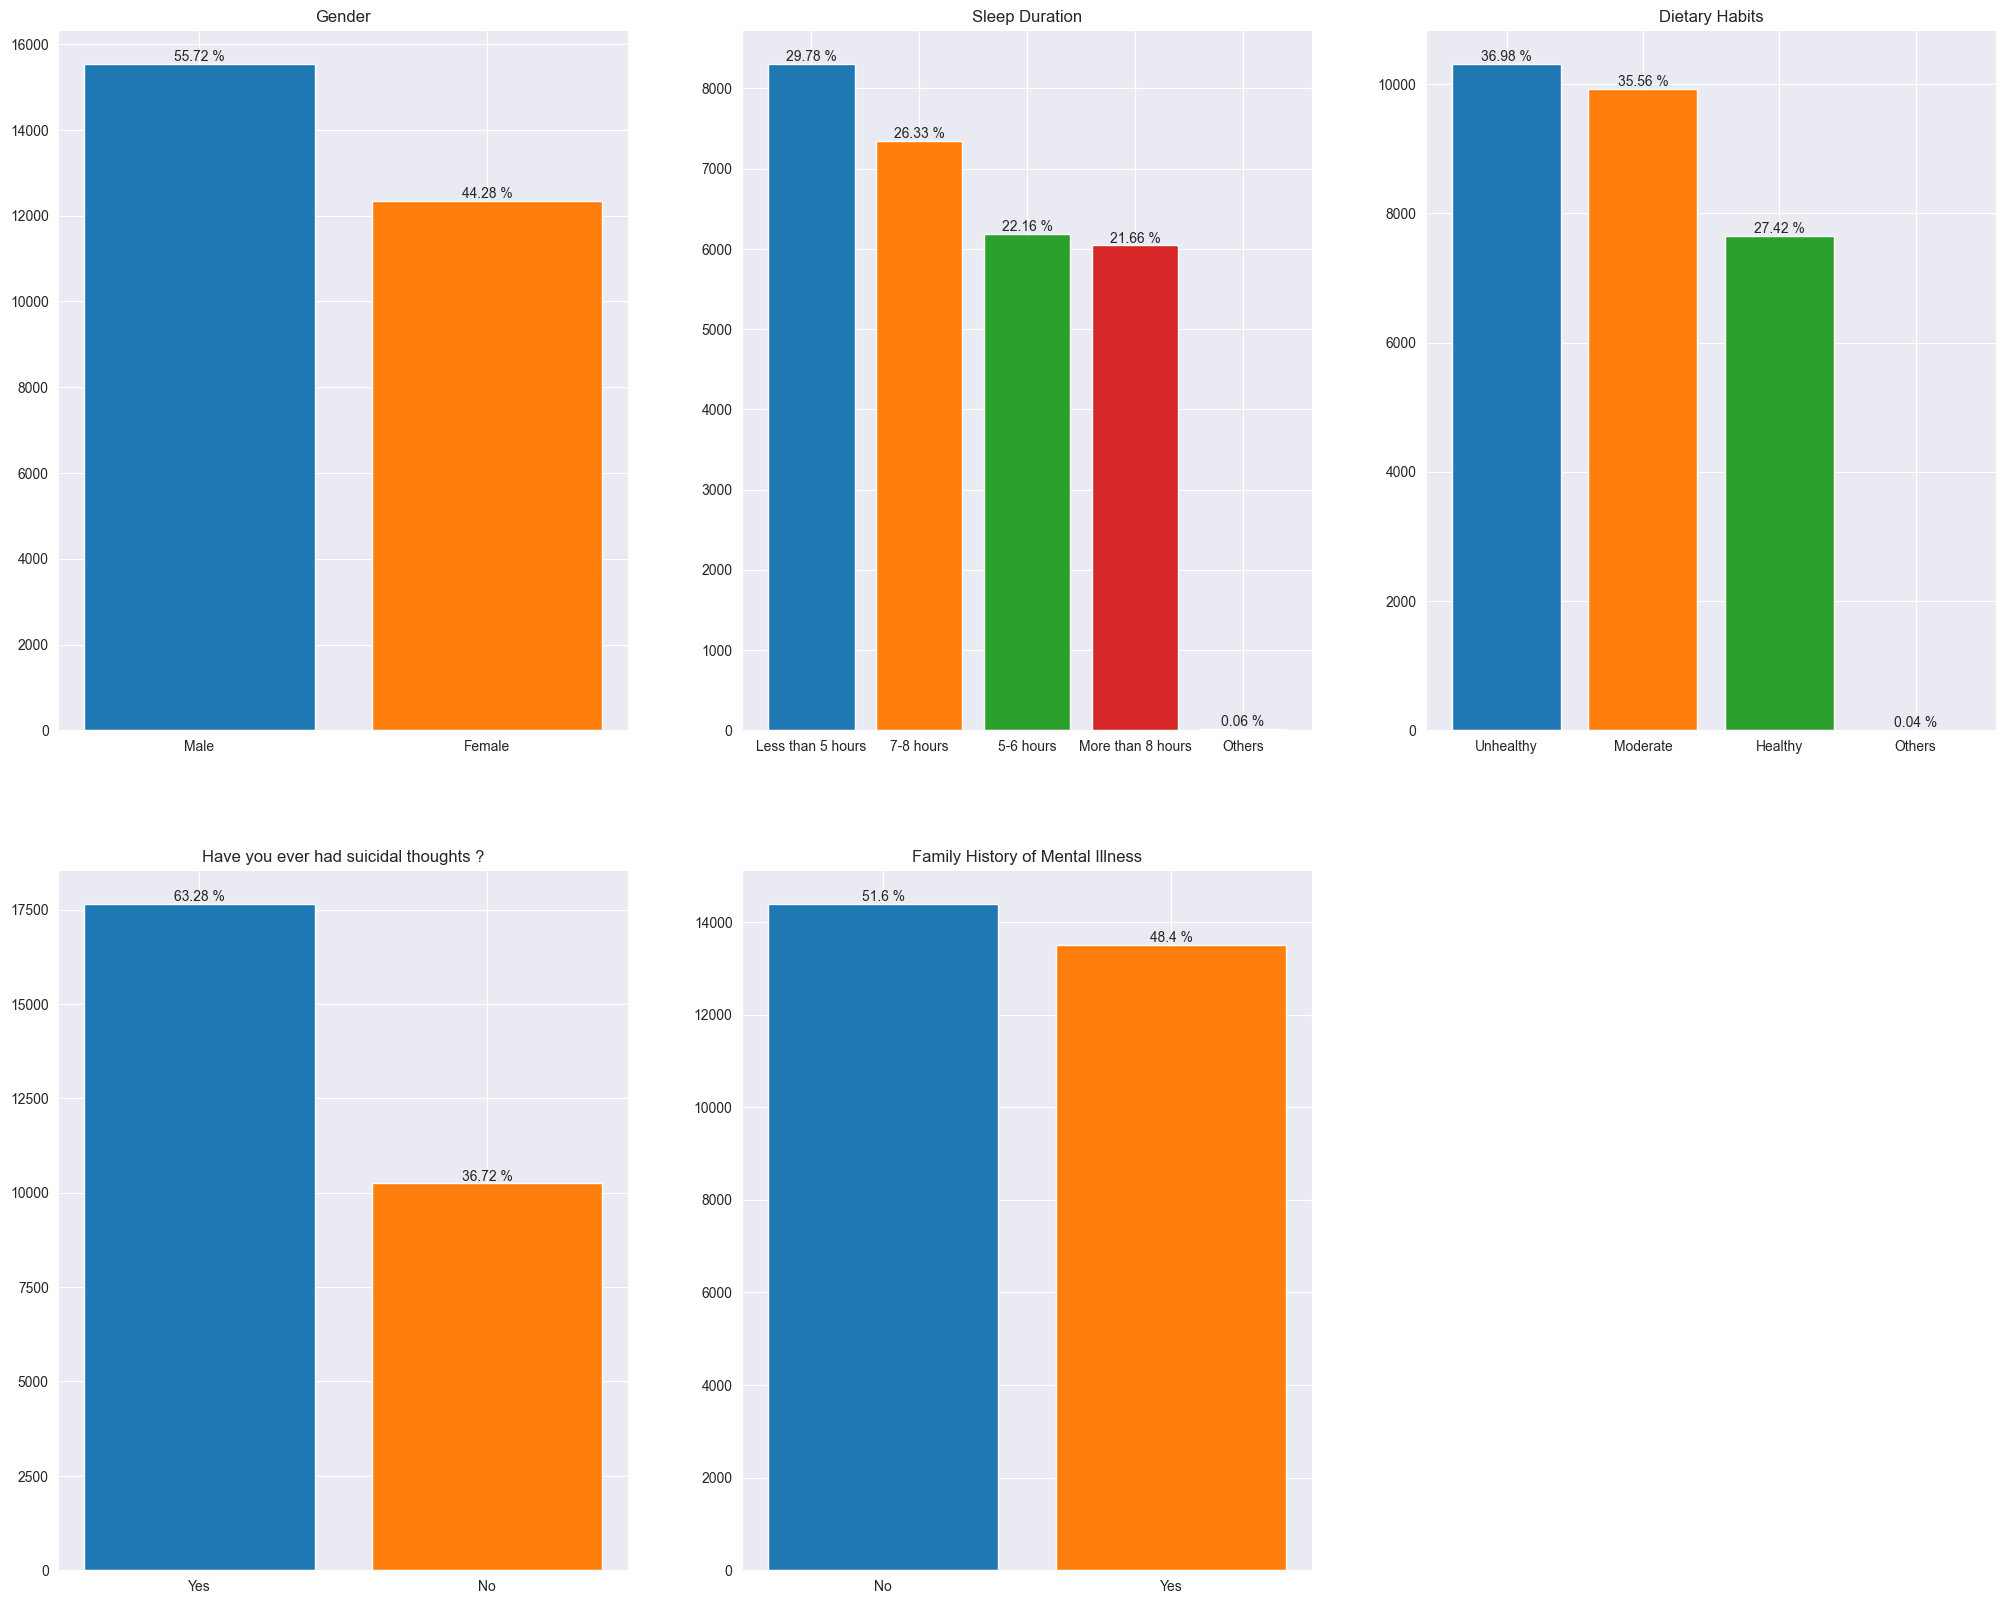

In [7]:
cat_col = ['Gender',
           'Sleep Duration',
           'Dietary Habits',
           'Have you ever had suicidal thoughts ?',
           'Family History of Mental Illness']
count = 1
plt.figure(figsize = (25,20))
for i in cat_col:
    val_con = df[i].value_counts()
    plt.subplot(2, 3, count)
    plt.title(i)
    for j in val_con.index:
        plt.bar(j, val_con.loc[j])
        plt.text(j, val_con.loc[j], str(round(val_con.loc[j] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')
    if i == 'Profession':
        plt.xticks(range(len(val_con.index)), val_con.index, rotation = 'vertical')
    count += 1

In [8]:
df['City'].value_counts()

Kalyan                1570
Srinagar              1372
Hyderabad             1340
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1066
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               685
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                   1
M

In [9]:
df['Degree'].value_counts()

Class 12    6080
B.Ed        1867
B.Com       1506
B.Arch      1478
BCA         1433
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
MBBS         696
BBA          696
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: Degree, dtype: int64

In [10]:
bachelor = ['B.Ed', 'B.Com', 'B.Arch', 'BCA', 'B.Tech', 'BHM', 'BSc', 'B.Pharm', 'MBBS', 'BBA', 'LLB', 'BE', 'BA']
master = ['MSc', 'MCA', 'M.Tech', 'M.Ed', 'M.Com', 'M.Pharm', 'MD', 'MBA', 'MA', 'LLM', 'MHM', 'ME']

In [11]:
degree = df['Degree'].copy()
degree_rep = {'Bachelor' : bachelor, 'Master' : master}
for i in degree_rep:
    for j in degree_rep[i]:
        degree.replace({j : i}, inplace = True)

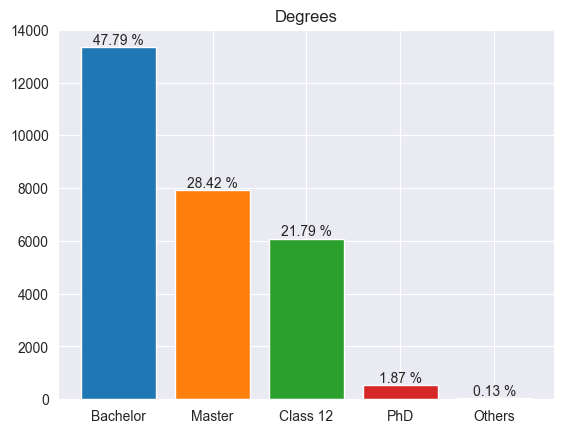

In [12]:
val_con = degree.value_counts()

plt.title('Degrees')
for i in val_con.index:
    plt.bar(i, val_con.loc[i])
    plt.text(i, val_con.loc[i], str(round(val_con.loc[i] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')

In [13]:
num_col = ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress']
df[num_col].nunique()

Age                    34
Academic Pressure       6
Work Pressure           3
CGPA                  332
Study Satisfaction      6
Job Satisfaction        5
Work/Study Hours       13
Financial Stress        5
dtype: int64

In [14]:
num_col_dis = ['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']
num_col_con = ['CGPA']

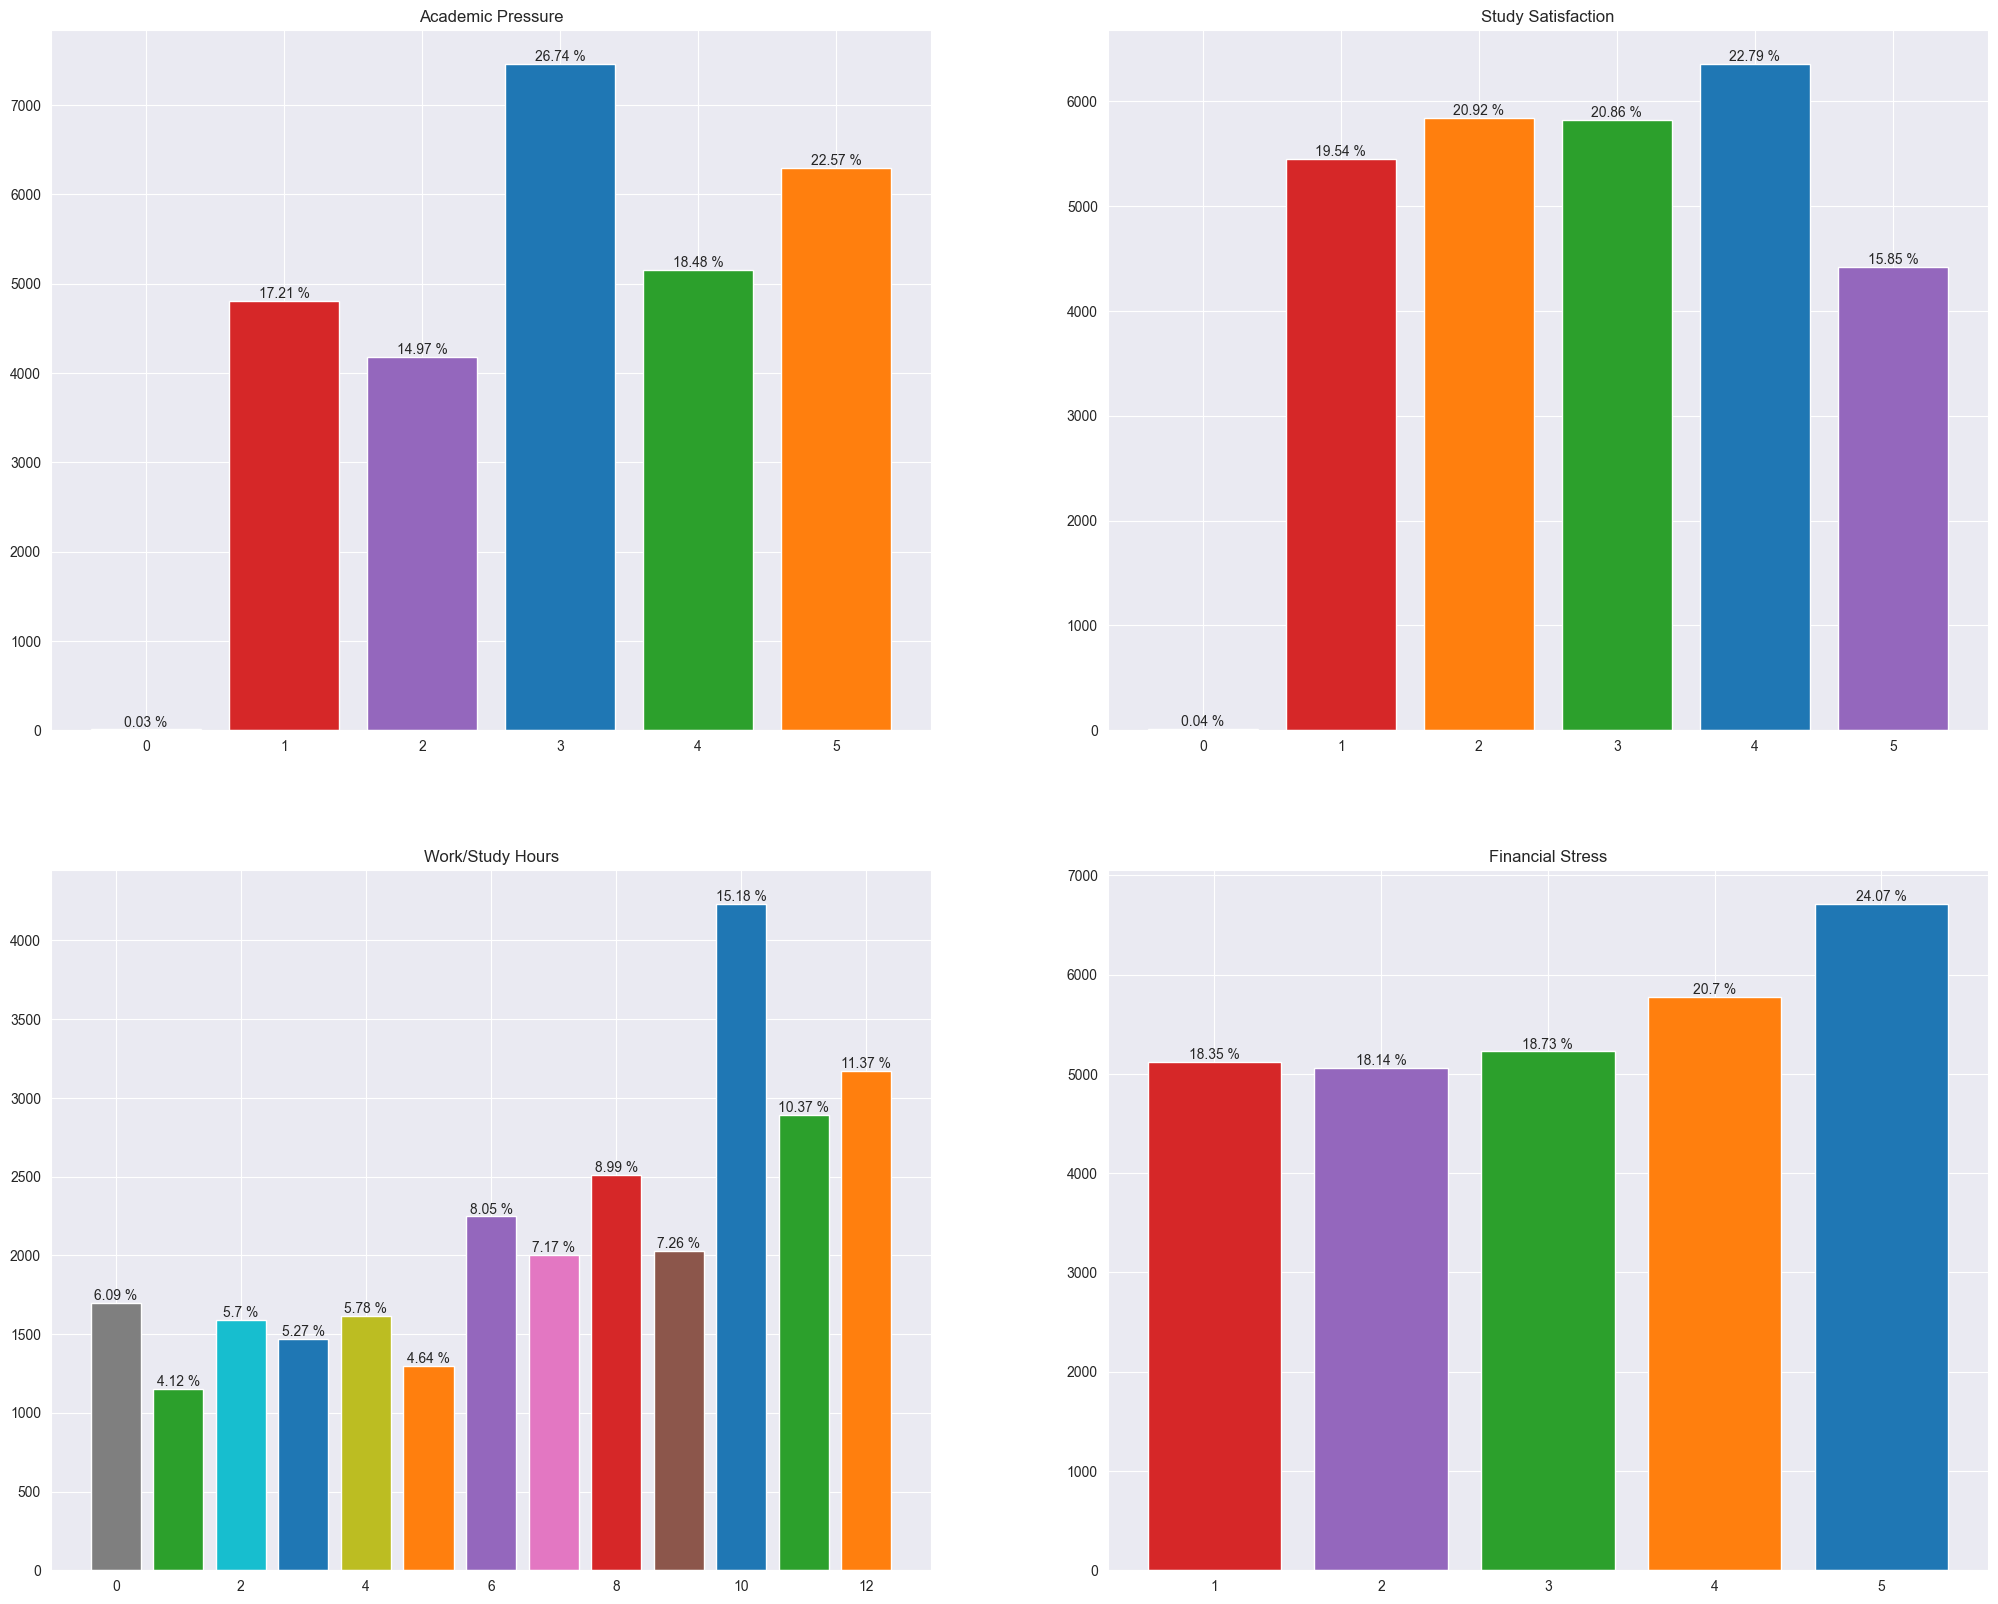

In [15]:
count = 1
plt.figure(figsize = (25,20))
for i in num_col_dis:
    val_con = df[i].value_counts()
    plt.subplot(2, 2, count)
    plt.title(i)
    for j in val_con.index:
        plt.bar(j, val_con.loc[j])
        plt.text(j, val_con.loc[j], str(round(val_con.loc[j] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')
    count += 1

Text(High, 12324, '44.17 %')

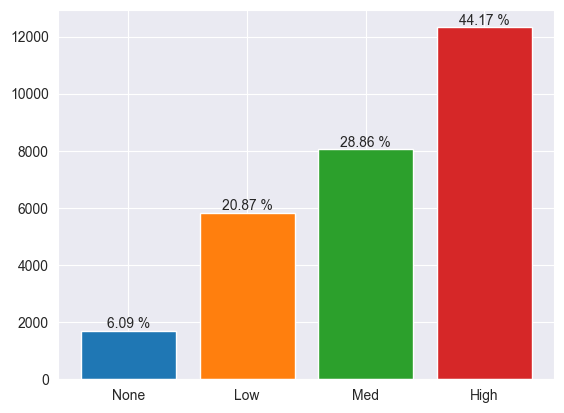

In [16]:
no_study = len(df[df['Work/Study Hours'] == 0])
plt.bar('None', no_study)
plt.text('None', no_study, str(round(no_study / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')
study_1_4 = len(df[(df['Work/Study Hours'] >= 1) & (df['Work/Study Hours'] <= 4)])
plt.bar('Low', study_1_4)
plt.text('Low', study_1_4, str(round(study_1_4 / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')
study_5_8 = len(df[(df['Work/Study Hours'] >= 5) & (df['Work/Study Hours'] <= 8)])
plt.bar('Med', study_5_8)
plt.text('Med', study_5_8, str(round(study_5_8 / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')
study_9_12 = len(df[(df['Work/Study Hours'] >= 9) & (df['Work/Study Hours'] <= 12)])
plt.bar('High', study_9_12)
plt.text('High', study_9_12, str(round(study_9_12 / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')

In [17]:
df[(df['Age'] < 40) & (df['Age'] >= 30)]['Age'].value_counts()

33.0    1893
34.0    1468
31.0    1427
32.0    1262
30.0    1145
35.0      10
38.0       8
36.0       7
39.0       3
37.0       2
Name: Age, dtype: int64

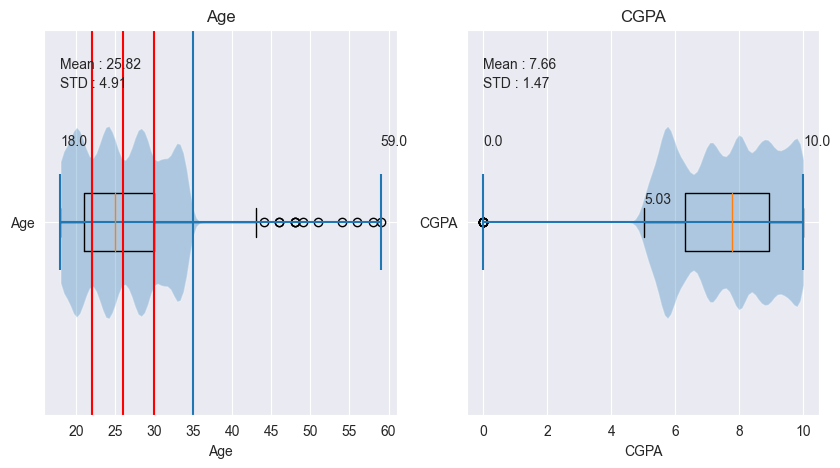

In [18]:
count = 1
plt.figure(figsize = (10, 5))
for i in ['Age', 'CGPA']:
    plt.subplot(1, 2, count)
    plt.title(i)
    plt.boxplot(df[i], vert = False)
    plt.violinplot(df[i], vert = False)
    plt.yticks([1], [i])
    plt.xlabel(i)

    desc_val = df[i].describe()
    plt.text(desc_val['min'], 1.4, 'Mean : ' + str(round(desc_val['mean'], 2)))
    plt.text(desc_val['min'], 1.35, 'STD : ' + str(round(desc_val['std'], 2)))
    plt.text(desc_val['min'], 1.2, desc_val['min'])
    plt.text(desc_val['max'], 1.2, desc_val['max'])
    if i == 'Age':
        plt.xticks([20 + (5 * i) for i in range(0, 9)])
        plt.axvline(35)
        plt.axvline(22, color = 'red')
        plt.axvline(26, color = 'red')
        plt.axvline(30, color = 'red')
    if i == 'CGPA':
        smol_val = df[df['CGPA'] > 0]['CGPA'].min()
        plt.text(smol_val, 1.05, smol_val)
    count += 1

In [19]:
age_group = []
for i in df['Age']:
    if (i >= 18) & (i < 22):
        val = '18-22'
    if (i >= 22) & (i < 26):
        val = '22-26'
    if (i >= 26) & (i < 30):
        val = '26-30'
    if (i >= 30):
        val = '>30'
    age_group.append(val)

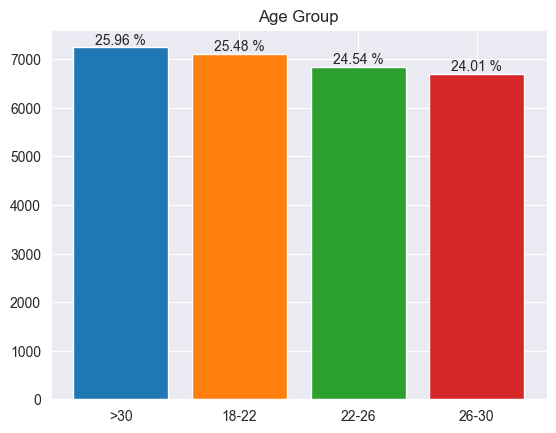

In [20]:
val_con = pd.Series(age_group).value_counts()

plt.title('Age Group')
for i in val_con.index:
    plt.bar(i, val_con.loc[i])
    plt.text(i, val_con.loc[i], str(round(val_con.loc[i] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')

In [21]:
def get_grade(cgpa):
    percentage = cgpa * 9.5
    if percentage <= 50:
        return '<=C2'
    elif percentage <= 60:
        return 'C1'
    elif percentage <= 70:
        return 'B2'
    elif percentage <= 80:
        return 'B1'
    elif percentage <= 90:
        return 'A2'
    elif percentage <= 100:
        return 'A1'
    
    
grade_letter = [get_grade(cgpa) for cgpa in df['CGPA']]

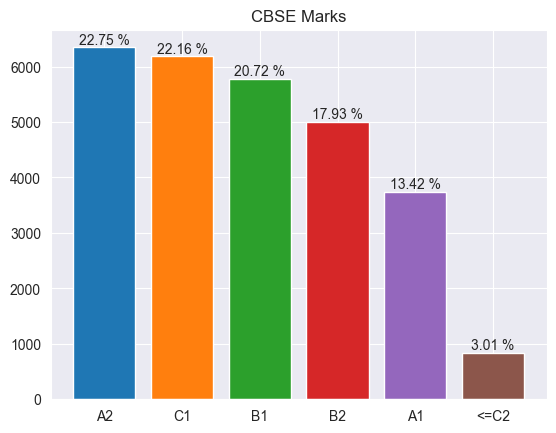

In [22]:
val_con = pd.Series(grade_letter).value_counts()

plt.title('CBSE Marks')
for i in val_con.index:
    plt.bar(i, val_con.loc[i])
    plt.text(i, val_con.loc[i], str(round(val_con.loc[i] / len(df) * 100, 2)) + ' %', ha = 'center', va = 'bottom')

In [23]:
drop_col = ['id', 'City', 'Profession', 'Work Pressure', 'Job Satisfaction']
df.drop(drop_col, axis = 1, inplace = True)

df['Sleep Duration'] = df['Sleep Duration'].replace({'Others' : 'Less than 5 hours'}).copy()
df['Dietary Habits'] = df['Dietary Habits'].replace({'Others' : 'Unhealthy'}).copy()
df['Academic Pressure'] = df['Academic Pressure'].replace({0 : 1}).copy()
df['Study Satisfaction'] = df['Study Satisfaction'].replace({0 : 1}).copy()
df['Financial Stress'] = df['Financial Stress'].fillna(1).copy()

df['Degree'] = degree
df['Degree'] = df['Degree'].replace({'Others' : 'Bachelor'}).copy()
hour_val = []
for i in df['Work/Study Hours']:
    if i == 0:
        val = 'None'
    elif (i >= 1) & (i <= 4):
        val = 'Low'
    elif (i >= 5) & (i <= 8):
        val = 'Med'
    elif (i >= 9) & (i <= 12):
        val = 'High'
    hour_val.append(val)
df['Work/Study Hours (Str)'] = hour_val
df.drop('Work/Study Hours', axis = 1, inplace = True)

df['CGPA'] = grade_letter
df['Age'] = age_group
df.rename({'CGPA' : 'Grade'}, axis = 1, inplace = True)

df.rename({'Academic Pressure' : 'Acad Press',
                  'Study Satisfaction' : 'Study Satis.',
                  'Have you ever had suicidal thoughts ?' : 'Suicidal Thoughts',
                  'Family History of Mental Illness' : 'Mental Fam. His.',
                  'Work/Study Hours (Str)' : 'Work Hours'}, axis = 1, inplace = True)

df['Gender_Bool'] = df['Gender'] == 'Male'
df['Suicidal Thoughts_Bool'] = df['Suicidal Thoughts'] == 'Yes'
df['Mental Fam. His._Bool'] = df['Mental Fam. His.'] == 'Yes'

df.drop(['Gender', 'Suicidal Thoughts', 'Mental Fam. His.'], axis = 1, inplace = True)

df[['Acad Press', 'Study Satis.', 'Financial Stress']] /= 5

cat_col_2 = ['Age', 'Grade', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Work Hours']
df_dummy = pd.get_dummies(df[cat_col_2], prefix = cat_col_2)

In [24]:
df_2 = pd.concat([df, df_dummy], axis = 1).drop(cat_col_2, axis = 1)
df_2.head()

,Acad Press,Study Satis.,Financial Stress,Depression,Gender_Bool,Suicidal Thoughts_Bool,Mental Fam. His._Bool,Age_18-22,Age_22-26,Age_26-30,...,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Degree_Bachelor,Degree_Class 12,Degree_Master,Degree_PhD,Work Hours_High,Work Hours_Low,Work Hours_Med,Work Hours_None
0,1.0,0.4,0.2,1,True,True,False,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.4,1.0,0.4,0,False,False,True,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,0.6,1.0,0.2,0,True,False,True,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,0.6,0.4,1.0,1,False,True,True,0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,0.8,0.6,0.2,0,False,True,False,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [25]:
df_2.corr()['Depression'].sort_values(ascending = False)

Depression                          1.000000
Suicidal Thoughts_Bool              0.546277
Acad Press                          0.474980
Financial Stress                    0.363607
Dietary Habits_Unhealthy            0.189453
Work Hours_High                     0.162082
Age_18-22                           0.150445
Degree_Class 12                     0.130970
Sleep Duration_Less than 5 hours    0.078537
Age_22-26                           0.056483
Mental Fam. His._Bool               0.053430
Grade_A2                            0.037702
Sleep Duration_7-8 hours            0.011551
Grade_B1                            0.006863
Age_26-30                           0.006499
Work Hours_Med                      0.003689
Gender_Bool                         0.001794
Grade_<=C2                         -0.008682
Grade_B2                           -0.010209
Degree_PhD                         -0.010540
Grade_A1                           -0.016975
Grade_C1                           -0.017818
Sleep Dura

In [26]:
from sklearn.feature_selection import mutual_info_classif

In [27]:
mi = mutual_info_classif(df_2, df_2['Depression'])

In [28]:
mi_score = pd.Series(mi, index = df_2.columns).sort_values(ascending = False)
mi_score

Depression                          0.684297
Suicidal Thoughts_Bool              0.158871
Acad Press                          0.120879
Financial Stress                    0.075411
Age_>30                             0.021289
Study Satis.                        0.020449
Dietary Habits_Unhealthy            0.017097
Dietary Habits_Healthy              0.016116
Work Hours_High                     0.016028
Age_18-22                           0.015858
Degree_Class 12                     0.009532
Work Hours_None                     0.008377
Work Hours_Low                      0.008333
Gender_Bool                         0.004876
Dietary Habits_Moderate             0.002931
Sleep Duration_7-8 hours            0.002568
Sleep Duration_Less than 5 hours    0.002439
Grade_A2                            0.002198
Age_22-26                           0.001764
Sleep Duration_More than 8 hours    0.001760
Mental Fam. His._Bool               0.001737
Grade_B1                            0.001223
Work Hours

In [29]:
mean = mi_score.drop('Depression', axis = 0).describe().loc['mean']
mi_score[mi_score > mean]

Depression                  0.684297
Suicidal Thoughts_Bool      0.158871
Acad Press                  0.120879
Financial Stress            0.075411
Age_>30                     0.021289
Study Satis.                0.020449
Dietary Habits_Unhealthy    0.017097
dtype: float64

In [30]:
mi_score[mi_score > mean].index

Index(['Depression', 'Suicidal Thoughts_Bool', 'Acad Press',
       'Financial Stress', 'Age_>30', 'Study Satis.',
       'Dietary Habits_Unhealthy'],
      dtype='object')

In [31]:
df_comp = df_2[mi_score[mi_score > mean].index].copy()
df_comp.head()

,Depression,Suicidal Thoughts_Bool,Acad Press,Financial Stress,Age_>30,Study Satis.,Dietary Habits_Unhealthy
0,1,True,1.0,0.2,1,0.4,0
1,0,False,0.4,0.4,0,1.0,0
2,0,False,0.6,0.2,1,1.0,0
3,1,True,0.6,1.0,0,0.4,0
4,0,True,0.8,0.2,0,0.6,0


In [32]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [33]:
for i in range(2, 11):
    km = KMeans(n_clusters = i, random_state = 99, n_init = 'auto').fit(df_comp.values)
    print(i, ':', metrics.silhouette_score(df_comp.values, km.labels_))

2 : 0.31428539637081804
3 : 0.29770293923256763
4 : 0.3055676947759801
5 : 0.3274899886568448
6 : 0.3435527923150017
7 : 0.36279410918660826
8 : 0.30449627182851013
9 : 0.32662893808675714
10 : 0.34656452522975406


In [34]:
km = KMeans(n_clusters = 2, random_state = 99, n_init = 'auto').fit(df_comp.values)
print(2, ':', metrics.silhouette_score(df_comp.values, km.labels_))

2 : 0.31428539637081804


In [35]:
pd.Series(km.labels_).value_counts()

0    16263
1    11638
dtype: int64

In [36]:
df_comp['Label'] = km.labels_

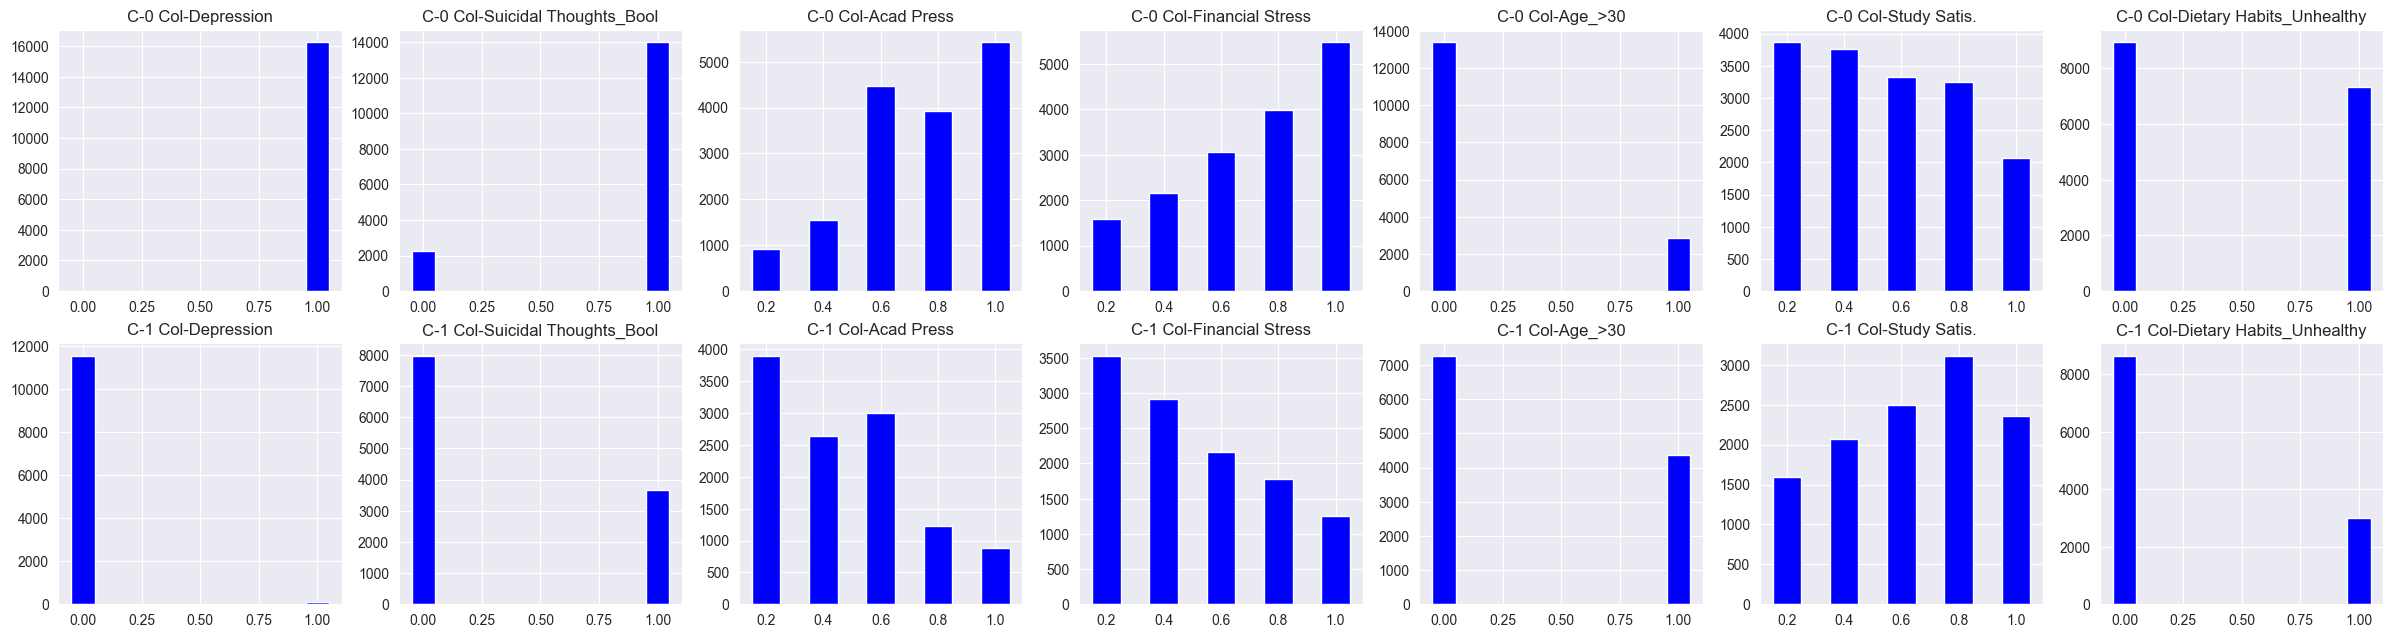

In [37]:
count = 1
true_false = {0 : 'red', 1 : 'green'}
plt.figure(figsize = (30, 40))
for i in df_comp['Label'].unique():
    for j in df_comp.columns:
        if j != 'Label':
            val_con = df_comp[df_comp['Label'] == i][j].value_counts()
            plt.subplot(10, 7, count)
            plt.title('C-' + str(i) + ' Col-' + str(j))
            for k in val_con.index:
                color = 'blue'
                if len(val_con.index) == 1:
                    color = true_false[k]
                plt.bar(k, val_con.loc[k], width = 0.1, color = color)
            count += 1

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as log_res

In [39]:
X = df_comp.drop('Depression', axis = 1).copy()
y = df_comp['Depression'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 2/3, test_size = 1/3, random_state = 99)
print('Train Size :', len(X_train))
print('Test Size :', len(X_test))

Train Size : 18600
Test Size : 9301


In [40]:
loggy = log_res(random_state = 99).fit(X_train, y_train)
print(loggy.score(X_test, y_test))

0.9948392645952048


In [41]:
print(loggy.score(X_train, y_train))

0.9953225806451613


In [42]:
test_res = loggy.predict(X_test)

In [45]:
from sklearn.metrics import ConfusionMatrixDisplay

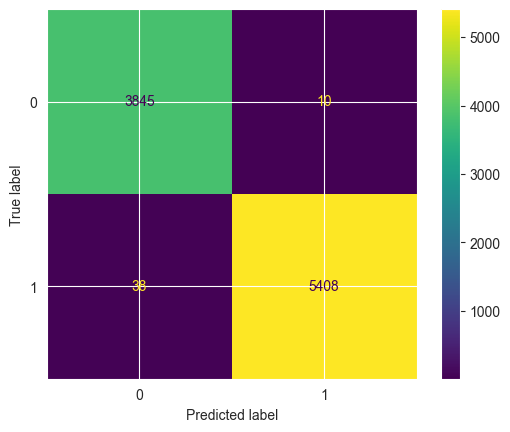

In [46]:
ConfusionMatrixDisplay.from_estimator(loggy, X_test, y_test)